In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv("F:\MachineLearningProjects\gld_price_data.csv")

In [5]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
data.shape

(2290, 6)

In [12]:
data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
#Data Analysis
data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

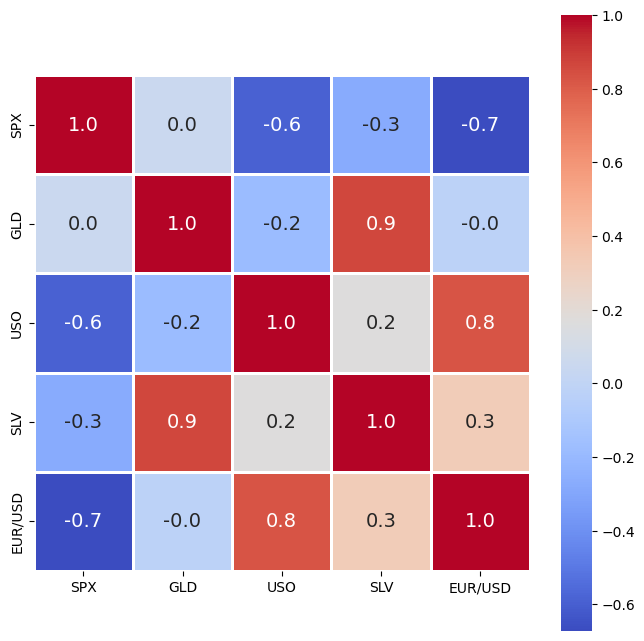

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot = True, cbar=True,square=True,fmt='.1f',annot_kws = {'size':14,},cmap='coolwarm',linewidth=2)


In [40]:
corr=data.corr()

In [41]:
corr['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

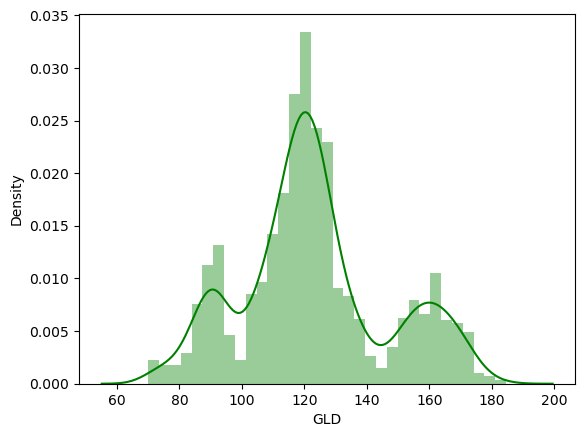

In [44]:
sns.distplot(data.GLD,color='green')

In [45]:
X = data.drop(columns=['Date','GLD'],axis=1)

In [46]:
y = data['GLD']

In [52]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [48]:
y.shape

(2290,)

In [53]:
# train test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [55]:
model = RandomForestRegressor(random_state=1,n_estimators=100)

In [56]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [57]:
test_pred = model.predict(X_test)

In [58]:
train_pred = model.predict(X_train)

In [60]:
print('r2 score for test data::',metrics.r2_score(y_test,test_pred))
print('Mean Abs Error for test data::',metrics.mean_absolute_error(y_test,test_pred))

r2 score for test data:: 0.9885388653083798
Mean Abs Error for test data:: 1.2653826434716136


In [61]:
print('r2 score for train data::',metrics.r2_score(y_train,train_pred))
print('Mean Abs Error for train data::',metrics.mean_absolute_error(y_train,train_pred))

r2 score for train data:: 0.9985698984340905
Mean Abs Error for train data:: 0.48259592140829444


In [64]:
y_test=list(y_test)
y_train = list(y_train)

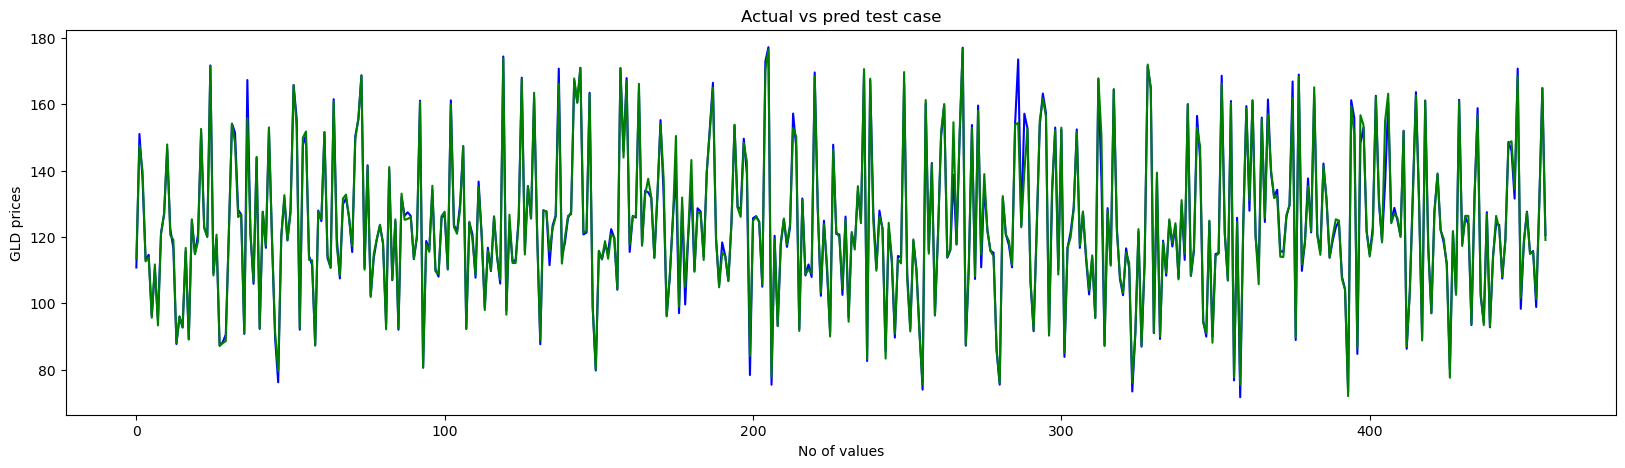

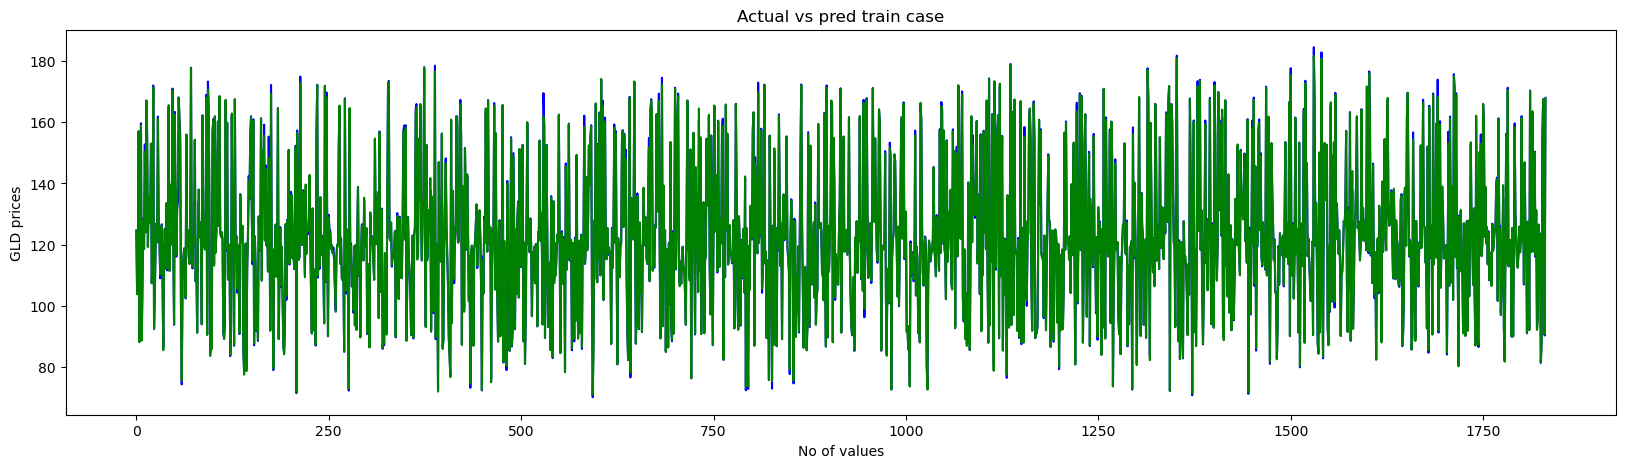

In [84]:
# Compare Actual vs predict
plt.figure(figsize=(20,5))

plt.subplot(1,1,1)
plt.plot(y_test,color='blue',label='actual')
plt.plot(test_pred,color='green',label='pred')
plt.title('Actual vs pred test case')
plt.xlabel('No of values')
plt.ylabel('GLD prices')
plt.show()
plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
plt.plot(y_train,color='blue',label='actual')
plt.plot(train_pred,color='green',label='pred')
plt.title('Actual vs pred train case')
plt.xlabel('No of values')
plt.ylabel('GLD prices')
plt.show()